In [ ]:
!pip install pandas-datareader
!pip install yfinance

     |████████████████████████████████| 5.5MB 5.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=664ea482e8a91142c3d2cff329bf6221ab08e2a8306c0291893960003622620d
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
from google.colab import files
nse200 = files.upload()

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime
import yfinance as yf
yf.pdr_override()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

In [ ]:
nse200 = pd.read_csv('/content/ind_nifty200list.csv')

In [ ]:
nse200

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,AU Small Finance Bank Ltd.,FINANCIAL SERVICES,AUBANK,EQ,INE949L01017
2,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
3,Adani Power Ltd.,POWER,ADANIPOWER,EQ,INE814H01011
4,Adani Transmission Ltd.,POWER,ADANITRANS,EQ,INE931S01010
...,...,...,...,...,...
196,Vodafone Idea Ltd.,TELECOM,IDEA,EQ,INE669E01016
197,Voltas Ltd.,CONSUMER GOODS,VOLTAS,EQ,INE226A01021
198,Whirlpool of India Ltd.,CONSUMER GOODS,WHIRLPOOL,EQ,INE716A01013
199,Wipro Ltd.,IT,WIPRO,EQ,INE075A01022


In [ ]:
for i in range(len(nse200)):
    nse200['Symbol'][i] = nse200['Symbol'][i] + '.NS'

In [ ]:
list_of_stocks = pd.DataFrame(nse200['Symbol'])

In [ ]:
list_of_stocks

,Symbol
0,ACC.NS
1,AUBANK.NS
2,ADANIPORTS.NS
3,ADANIPOWER.NS
4,ADANITRANS.NS
...,...
196,IDEA.NS
197,VOLTAS.NS
198,WHIRLPOOL.NS
199,WIPRO.NS


In [ ]:
start = datetime(2015,1,1)
end = datetime(2020,2,1)

In [ ]:
list_of_stock_data_in_sequence = []

for i in range(len(list_of_stocks)):
    stk = pdr.DataReader(list_of_stocks['Symbol'][i], start = start, end=end)
    list_of_stock_data_in_sequence.append(stk)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
len(list_of_stock_data_in_sequence)

201

In [ ]:
l = []

list_of_stock_data_for_training = []
list_of_stock_data_for_backtesting = []

for i in range(200):
    if len(list_of_stock_data_in_sequence[i]) == len(list_of_stock_data_in_sequence[0]):
        list_of_stock_data_for_training.append(list_of_stock_data_in_sequence[i][:datetime(2019,1,1)])
        list_of_stock_data_for_backtesting.append(list_of_stock_data_in_sequence[i][datetime(2019,1,2):])
        l.append(i)

In [ ]:
list_of_stock_data_for_training[2]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,44.099998,44.349998,43.799999,44.200001,44.200001,1790247
2015-01-02,44.200001,45.299999,44.200001,44.950001,44.950001,2926043
2015-01-05,45.000000,46.000000,44.849998,45.099998,45.099998,3236445
2015-01-06,44.750000,45.750000,43.549999,44.049999,44.049999,5952755
2015-01-07,43.900002,44.700001,43.299999,44.150002,44.150002,3820161
...,...,...,...,...,...,...
2018-12-26,50.500000,51.900002,49.500000,50.849998,50.849998,12324109
2018-12-27,51.200001,52.000000,51.000000,51.349998,51.349998,10525643
2018-12-28,51.250000,51.700001,50.599998,50.950001,50.950001,9364158


In [ ]:
training_stock_dataframe = pd.DataFrame(index = list_of_stock_data_for_training[0].index)
testing_stock_dataframe = pd.DataFrame(index = list_of_stock_data_for_backtesting[0].index)

In [ ]:
print(len(list_of_stock_data_for_training))
print(len(list_of_stock_data_for_backtesting))
print(len(l))

156
156
156


In [ ]:
for i in range(len(l)):
    training_stock_dataframe['AdjClose_'+list_of_stocks.loc[l[i]]] = list_of_stock_data_for_training[i]['Adj Close'].values.reshape(len(list_of_stock_data_for_training[i]),1)
    testing_stock_dataframe['AdjClose_'+list_of_stocks.loc[l[i]]] = list_of_stock_data_for_backtesting[i]['Adj Close'].values.reshape(len(list_of_stock_data_for_backtesting[i]),1)

In [ ]:
new_list_of_stocks = []

for i in l:
    new_list_of_stocks.append(list_of_stocks.loc[i])

In [ ]:
len(new_list_of_stocks)

156

In [ ]:
training_stock_dataframe

,AdjClose_ACC.NS,AdjClose_AARTIIND.NS,AdjClose_ABBOTINDIA.NS,AdjClose_ADANIENT.NS,AdjClose_ADANIPORTS.NS,AdjClose_ABFRL.NS,AdjClose_AJANTPHARM.NS,AdjClose_APLLTD.NS,AdjClose_AMARAJABAT.NS,AdjClose_AMBUJACEM.NS,AdjClose_APOLLOHOSP.NS,AdjClose_APOLLOTYRE.NS,AdjClose_ASHOKLEY.NS,AdjClose_ASIANPAINT.NS,AdjClose_AUROPHARMA.NS,AdjClose_AXISBANK.NS,AdjClose_BAJAJ-AUTO.NS,AdjClose_BAJFINANCE.NS,AdjClose_BAJAJFINSV.NS,AdjClose_BAJAJHLDNG.NS,AdjClose_BALKRISIND.NS,AdjClose_BANKBARODA.NS,AdjClose_BANKINDIA.NS,AdjClose_BATAINDIA.NS,AdjClose_BERGEPAINT.NS,AdjClose_BEL.NS,AdjClose_BHARATFORG.NS,AdjClose_BHEL.NS,AdjClose_BPCL.NS,AdjClose_BIOCON.NS,AdjClose_BBTC.NS,AdjClose_BOSCHLTD.NS,AdjClose_BRITANNIA.NS,AdjClose_CESC.NS,AdjClose_CADILAHC.NS,AdjClose_CANBK.NS,AdjClose_CASTROLIND.NS,AdjClose_CHOLAFIN.NS,AdjClose_CIPLA.NS,AdjClose_CUB.NS,...,AdjClose_PEL.NS,AdjClose_PFC.NS,AdjClose_POWERGRID.NS,AdjClose_PRESTIGE.NS,AdjClose_PGHH.NS,AdjClose_PNB.NS,AdjClose_RECLTD.NS,AdjClose_RAJESHEXPO.NS,AdjClose_RELIANCE.NS,AdjClose_SRF.NS,AdjClose_SHREECEM.NS,AdjClose_SIEMENS.NS,AdjClose_SBIN.NS,AdjClose_SAIL.NS,AdjClose_SUNPHARMA.NS,AdjClose_SUNTV.NS,AdjClose_TVSMOTOR.NS,AdjClose_TATACHEM.NS,AdjClose_TCS.NS,AdjClose_TATAMOTORS.NS,AdjClose_TATAPOWER.NS,AdjClose_TATASTEEL.NS,AdjClose_TECHM.NS,AdjClose_RAMCOCEM.NS,AdjClose_TITAN.NS,AdjClose_TORNTPHARM.NS,AdjClose_TORNTPOWER.NS,AdjClose_TRENT.NS,AdjClose_UPL.NS,AdjClose_ULTRACEMCO.NS,AdjClose_UNIONBANK.NS,AdjClose_UBL.NS,AdjClose_MCDOWELL-N.NS,AdjClose_VGUARD.NS,AdjClose_IDEA.NS,AdjClose_VOLTAS.NS,AdjClose_WHIRLPOOL.NS,AdjClose_WIPRO.NS,AdjClose_YESBANK.NS,AdjClose_ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,1254.093750,119.185677,3633.688721,70.804619,310.876160,119.900002,901.962891,426.589752,775.325867,198.153030,1096.898438,199.123367,44.344593,719.119446,547.710999,488.996094,2110.233398,323.132202,1281.914307,1280.814209,282.130096,210.241135,296.099823,616.027527,138.492020,51.493214,434.613983,160.261826,144.400269,61.882900,382.292786,18621.597656,844.555420,526.911377,288.672058,420.424469,179.830627,85.022057,614.097229,74.952271,...,736.456909,103.628784,111.849304,231.857605,5558.950195,214.232620,92.149063,146.804825,415.367096,841.735596,9208.337891,871.691101,303.322327,79.217148,797.984009,319.111420,266.202606,156.811401,1084.451416,492.960358,67.546486,334.816986,568.705200,335.954590,365.296967,1062.890259,141.229904,128.516647,212.826874,2618.766602,227.818588,826.357056,563.659973,64.805237,94.304688,226.369583,641.497925,186.041550,129.212143,363.660522
2015-01-02,1274.063843,120.251282,3722.503174,71.151360,310.681580,118.849998,883.125000,437.992279,767.384155,200.937164,1098.798584,199.167908,45.538490,743.981262,550.334961,499.931854,2109.889160,317.966248,1271.004272,1307.439209,283.000519,212.803513,299.407623,626.683411,154.601013,51.235725,437.046692,164.290039,142.236954,62.421528,420.517120,18703.632812,866.251587,536.286987,291.474640,419.863556,180.262329,88.140732,615.807434,74.833008,...,742.381775,103.950661,113.195419,222.808563,5582.816895,214.378922,91.929451,147.695419,414.267700,885.291748,9157.621094,879.045776,304.529816,79.312874,801.914734,316.667084,256.515564,158.128448,1098.885010,506.164001,68.533165,340.032959,571.488098,335.225281,368.182404,1106.500977,144.167557,127.385643,219.462143,2697.059082,227.015594,827.347168,562.549988,66.929329,94.630165,230.928955,653.275818,187.692291,132.498688,366.789673
2015-01-05,1280.988770,118.421234,3835.539062,72.329041,315.010742,120.000000,894.676392,435.596802,771.806824,200.676163,1102.451904,204.466599,49.290722,743.933228,550.067871,503.091003,2117.591553,317.135284,1254.115723,1326.554321,295.600464,212.745270,298.677979,628.582153,149.510696,50.267796,438.483093,163.156754,142.513062,62.508881,440.843933,18891.529297,866.851013,539.822571,304.323456,421.501129,180.711990,89.524811,618.592651,77.336716,...,741.144226,103.154449,113.317787,221.027649,

In [ ]:
testing_stock_dataframe

,AdjClose_ACC.NS,AdjClose_AARTIIND.NS,AdjClose_ABBOTINDIA.NS,AdjClose_ADANIENT.NS,AdjClose_ADANIPORTS.NS,AdjClose_ABFRL.NS,AdjClose_AJANTPHARM.NS,AdjClose_APLLTD.NS,AdjClose_AMARAJABAT.NS,AdjClose_AMBUJACEM.NS,AdjClose_APOLLOHOSP.NS,AdjClose_APOLLOTYRE.NS,AdjClose_ASHOKLEY.NS,AdjClose_ASIANPAINT.NS,AdjClose_AUROPHARMA.NS,AdjClose_AXISBANK.NS,AdjClose_BAJAJ-AUTO.NS,AdjClose_BAJFINANCE.NS,AdjClose_BAJAJFINSV.NS,AdjClose_BAJAJHLDNG.NS,AdjClose_BALKRISIND.NS,AdjClose_BANKBARODA.NS,AdjClose_BANKINDIA.NS,AdjClose_BATAINDIA.NS,AdjClose_BERGEPAINT.NS,AdjClose_BEL.NS,AdjClose_BHARATFORG.NS,AdjClose_BHEL.NS,AdjClose_BPCL.NS,AdjClose_BIOCON.NS,AdjClose_BBTC.NS,AdjClose_BOSCHLTD.NS,AdjClose_BRITANNIA.NS,AdjClose_CESC.NS,AdjClose_CADILAHC.NS,AdjClose_CANBK.NS,AdjClose_CASTROLIND.NS,AdjClose_CHOLAFIN.NS,AdjClose_CIPLA.NS,AdjClose_CUB.NS,...,AdjClose_PEL.NS,AdjClose_PFC.NS,AdjClose_POWERGRID.NS,AdjClose_PRESTIGE.NS,AdjClose_PGHH.NS,AdjClose_PNB.NS,AdjClose_RECLTD.NS,AdjClose_RAJESHEXPO.NS,AdjClose_RELIANCE.NS,AdjClose_SRF.NS,AdjClose_SHREECEM.NS,AdjClose_SIEMENS.NS,AdjClose_SBIN.NS,AdjClose_SAIL.NS,AdjClose_SUNPHARMA.NS,AdjClose_SUNTV.NS,AdjClose_TVSMOTOR.NS,AdjClose_TATACHEM.NS,AdjClose_TCS.NS,AdjClose_TATAMOTORS.NS,AdjClose_TATAPOWER.NS,AdjClose_TATASTEEL.NS,AdjClose_TECHM.NS,AdjClose_RAMCOCEM.NS,AdjClose_TITAN.NS,AdjClose_TORNTPHARM.NS,AdjClose_TORNTPOWER.NS,AdjClose_TRENT.NS,AdjClose_UPL.NS,AdjClose_ULTRACEMCO.NS,AdjClose_UNIONBANK.NS,AdjClose_UBL.NS,AdjClose_MCDOWELL-N.NS,AdjClose_VGUARD.NS,AdjClose_IDEA.NS,AdjClose_VOLTAS.NS,AdjClose_WHIRLPOOL.NS,AdjClose_WIPRO.NS,AdjClose_YESBANK.NS,AdjClose_ZEEL.NS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-02,1417.675171,716.728699,7376.080078,153.259094,376.933746,195.550003,1141.796753,571.383484,714.565186,199.721664,1249.401001,217.464859,91.358803,1364.547119,716.531067,619.280884,2519.898926,2603.492188,6378.336426,2888.871094,884.959351,119.349998,104.800003,1090.910400,322.262634,83.992752,488.177155,68.760902,312.919495,310.807739,1302.333374,19014.144531,2999.663330,631.335999,332.153290,275.399994,128.430634,242.845215,510.256104,191.886688,...,2233.970215,96.148521,171.978714,228.411041,9675.271484,77.849998,96.867577,570.402466,1096.247681,1975.996460,16807.175781,1039.384521,293.899994,53.152275,433.250305,560.228882,529.319885,663.134888,1827.209595,168.550003,69.747688,468.919678,669.310364,633.315735,916.679565,1747.209229,241.751190,353.423981,494.391724,3983.300781,88.199997,1349.514282,619.750000,219.553848,22.159100,523.669128,1381.029297,242.496490,179.713730,464.926483
2019-01-03,1387.391235,706.081726,7322.085938,150.933228,373.770416,197.750000,1128.607300,572.810791,697.469421,195.069550,1257.242432,214.638794,89.713524,1369.479370,708.172363,607.195923,2528.651367,2575.754395,6377.637207,2915.457764,873.755554,119.300003,105.750000,1091.842407,320.096466,83.150017,480.877686,66.641556,308.155090,305.418030,1295.748169,18840.382812,3017.997070,618.886353,329.183777,276.299988,128.038406,235.679337,508.124054,191.489166,...,2179.494141,97.904236,170.040924,229.841080,9631.270508,77.849998,98.739014,572.494934,1082.722900,1960.126343,16815.611328,1027.923828,291.100006,51.626610,429.361359,542.159973,531.891113,657.079285,1805.026123,166.050003,69.141991,457.140900,649.758789,623.440369,915.745300,1774.531738,246.241196,348.496643,487.955139,3877.854492,88.750000,1362.507080,620.099976,215.152893,21.767200,522.208740,1374.948853,242.458755,179.178436,456.226105
2019-01-04,1403.488525,722.978455,7353.982422,150.982727,377.774017,198.449997,1107.229492,570.054504,704.921448,197.532455,1283.396729,219.866989,88.479561,1367.062500,718.014893,618.831421,2559.401123,2565.645752,6404.763184,2890.388916,865.073730,121.699997,108.699997,1095.275879,318.127258,86.005951,480.532440,67.253807,314.230804,308.686798,1288.763794,18976.074219,3005.293213,621.489929,329.710602,282.950012,129.215042,237.083069,508.520691,193.774734,...,2248.16

In [ ]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_training_stock_data = scaler.fit_transform(training_stock_dataframe)
def Scaling(train_data, test_data):
    if (isinstance(train_data, np.ndarray) == False):
        train_data = train_data.values
    if (isinstance(test_data, np.ndarray) == False):
        test_data = test_data.values
    
    '''
    max = [0]*len(train)
    min = [0]*len(train)
    
    #Scaling of Training Data
    scaled_data=[]
    for i, stock in enumerate(train):
        max[i] = stock[0]
        min[i] = stock[0]
        l=[]
        for close_price in stock:
            if(close_price>max[i]):
                max[i] = close_price
            if(close_price<min[i]):
                min[i] = close_price

            l.append((close_price-min[i])/(max[i]-min[i]))
        scaled_data.append(l)

    scaled_train_data = np.array(scaled_data)
    scaled_train_data = scaled_train_data.T

    df = pd.DataFrame(scaled_train_data)
    df = df.replace(np.nan, 1)
    scaled_train_data = df.values
    '''

    max = np.max(train_data, 0)
    min = np.min(train_data, 0)
    
    test = test_data.T

    #Scaling of Training Data
    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(train_data)
    
    #Scaling of Testing Data
    scaled_data=[]
    for i, stock in enumerate(test):
        l=[]
        for close_price in stock:
            if(close_price>max[i]):
                max[i] = close_price
            if(close_price<min[i]):
                min[i] = close_price

            l.append((close_price-min[i])/(max[i]-min[i]))
        scaled_data.append(l)

    scaled_test_data = np.array(scaled_data)
    scaled_test_data = scaled_test_data.T

    return scaled_train_data, scaled_test_data

In [ ]:
scaled_training_stock_data, scaled_testing_stock_data = Scaling(training_stock_dataframe, testing_stock_dataframe)

In [ ]:
print(scaled_testing_stock_data.shape)
print(scaled_training_stock_data.shape)

(264, 156)
(987, 156)


No handles with labels found to put in legend.


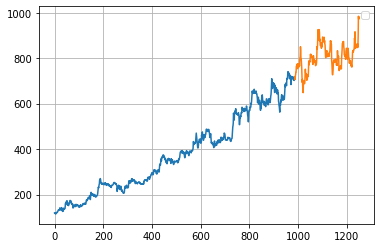

In [ ]:
#Plotting function
def Plotting(train, test, Stock = 1):

    if (isinstance(train, np.ndarray) == False):
        train = train.values
    if (isinstance(test, np.ndarray) == False):
        test = test.values

    train = train.T
    test = test.T

    plt.plot(np.arange(len(train[Stock])), train[Stock])
    plt.plot(np.arange(len(test[Stock]))+len(train[Stock]), test[Stock])
    plt.legend()
    plt.grid()
    plt.show()
    return None

Plotting(training_stock_dataframe, testing_stock_dataframe, Stock = 1)

No handles with labels found to put in legend.


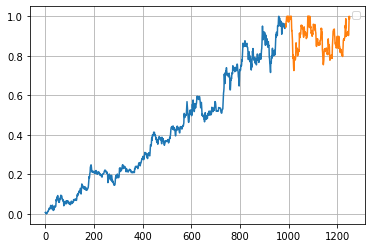

In [ ]:
Plotting(scaled_training_stock_data, scaled_testing_stock_data, 1)

In [ ]:
def corr(data):
    return np.corrcoef(data.T)

In [ ]:
corr_training_matrix = corr(scaled_training_stock_data)
corr_training_matrix

array([[ 1.        ,  0.38634181, -0.02483981, ...,  0.42022569,
         0.62687069,  0.56034749],
       [ 0.38634181,  1.        ,  0.77482482, ...,  0.45590432,
         0.73608409,  0.75524093],
       [-0.02483981,  0.77482482,  1.        , ...,  0.49985288,
         0.30670523,  0.35200577],
       ...,
       [ 0.42022569,  0.45590432,  0.49985288, ...,  1.        ,
         0.12367625,  0.11021248],
       [ 0.62687069,  0.73608409,  0.30670523, ...,  0.12367625,
         1.        ,  0.88284953],
       [ 0.56034749,  0.75524093,  0.35200577, ...,  0.11021248,
         0.88284953,  1.        ]])

In [ ]:
corr_training_matrix.shape

(156, 156)

In [ ]:
def mse(data):
    d = data.T
    d1 = np.tile(d, (d.shape[0],1,1))
    d2 = np.tile(d, (1,1,d.shape[0])).reshape(d.shape[0],d.shape[0],d.shape[1])
    
    mse = d1-d2
    mse = mse**2
    mse = np.mean(mse, 2)

    return mse

In [ ]:
mse_training_matrix = mse(scaled_training_stock_data)
mse_training_matrix

array([[0.        , 0.08461921, 0.15100682, ..., 0.05717763, 0.05777902,
        0.0544955 ],
       [0.08461921, 0.        , 0.04784603, ..., 0.06819122, 0.04357385,
        0.04791719],
       [0.15100682, 0.04784603, 0.        , ..., 0.0792341 , 0.12155958,
        0.13793432],
       ...,
       [0.05717763, 0.06819122, 0.0792341 , ..., 0.        , 0.11558564,
        0.09898851],
       [0.05777902, 0.04357385, 0.12155958, ..., 0.11558564, 0.        ,
        0.03009323],
       [0.0544955 , 0.04791719, 0.13793432, ..., 0.09898851, 0.03009323,
        0.        ]])

In [ ]:
mse_training_matrix.shape

(156, 156)

In [ ]:
threshold =0.015

a=np.where(mse_training_matrix < threshold, mse_training_matrix, 4)
arr_x=[]
arr_y=[]
for i in range(a.shape[0]):
  for j in range(i+1, a.shape[1]):
    if (a[i][j]!=4):
      arr_x.append(i)
      arr_y.append(j)
arr_x=np.array(arr_x)
mse_pairs=[[i, j] for i, j in zip(arr_x, arr_y)]
print('Total number of mse pairs = ',len(mse_pairs))

Total number of mse pairs =  556


In [ ]:
#Selecting Pairs through Correlation Coefficient
threshold = 0.95

corr_pairs = []
for i in range(corr_training_matrix.shape[0]):
    for j in range(i+1, corr_training_matrix.shape[1]):
        if corr_training_matrix[i,j] > threshold:
            corr_pairs.append([i,j])

print('Total number of correlation pairs = ',len(corr_pairs))

Total number of correlation pairs =  199


In [ ]:
#Backtesting
def Backtesting(testing_stock_dataframe, pairs, lookback = 'Complete', entry = 2, exit = 1, plot_which_zscores='All'):

    zscores_of_pairs = []
    for pair in pairs:
        #print('pair = ', pair)
        df = testing_stock_dataframe.iloc[:,pair[0]] - testing_stock_dataframe.iloc[:,pair[1]]
        df = pd.DataFrame(df).values
        l=[]
        if lookback == 'Complete':
            for i in range(len(df)):
                l.append( (df[i,0] - df[:i+1, 0].mean()) / df[:i+1, 0].std() )
        else:
            for i in range(len(df)):
                l.append( (df[i,0] - df[i-lookback:i+1, 0].mean()) / df[i-lookback:i+1, 0].std() )
        zscores_of_pairs.append(l)
    
    #PLOTTING
    if plot_which_zscores == 'All':
        for j, i in enumerate(zscores_of_pairs):
            plt.plot(i)
            plt.grid()
            plt.title('Pair-'+str(j))
            plt.show()
    elif plot_which_zscores == None:
        pass
    else:
        for i in plot_which_zscores:
            plt.plot(zscores_of_pairs[i])
            plt.grid()
            plt.title('Pair'+str(i))
            plt.show()

    zscores_of_pairs = np.array(zscores_of_pairs).T

    sell_entry = [0]*len(pairs)
    buy_entry = [0]*len(pairs)
    sell_exit = [0]*len(pairs)
    buy_exit = [0]*len(pairs)
    Number_of_trades = 0        #2 trades per pair signal
    Cummulative_returns = 100     #0.1% as the transaction
    Number_of_profitable_trades = 0
    Number_of_non_profitable_trades = 0
    position = [0]*len(pairs)
    data = testing_stock_dataframe.values
    for i in range(1, len(zscores_of_pairs)-1):
        for j, pair in enumerate(pairs):
            if zscores_of_pairs[i,j] >= entry and zscores_of_pairs[i-1,j] < entry and position[j]==0 :
                position[j] = 1
                sell_entry[j] = data[i+1, pair[0]]
                buy_entry[j] = data[i+1, pair[1]]
                Number_of_trades+=2

            elif zscores_of_pairs[i,j] <= exit and zscores_of_pairs[i-1,j] > exit and position[j] == 1 :
                position[j] = 0
                buy_exit[j] = data[i+1, pair[0]]
                sell_exit[j] = data[i+1, pair[1]]
                
                ret = (sell_entry[j] - buy_exit[j] - (sell_entry[j]*0.001 + buy_exit[j]*0.001))*Cummulative_returns / sell_entry[j]
                #print('ret = ',ret, 'pair_no = ', j+1, '  ', pair)
                if ret>0:
                    Number_of_profitable_trades+=1
                else:
                    Number_of_non_profitable_trades+=1
                Cummulative_returns += ret

                if Cummulative_returns<=0:
                    print('BANKRUPT in ', i, 'th iteration')
                    return Cummulative_returns-100, Number_of_trades, Number_of_profitable_trades, Number_of_non_profitable_trades

                ret = (sell_exit[j] - buy_entry[j] - (sell_exit[j]*0.001 + buy_entry[j]*0.001))*Cummulative_returns / buy_entry[j]
                #print('ret = ',ret, 'pair_no = ', j+1, '  ', pair)
                if ret>0:
                    Number_of_profitable_trades+=1
                else:
                    Number_of_non_profitable_trades+=1
                Cummulative_returns += ret
                if Cummulative_returns<=0:
                    print('BANKRUPT in ', i, 'th iteration')
                    return Cummulative_returns-100, Number_of_trades, Number_of_profitable_trades, Number_of_non_profitable_trades

            elif zscores_of_pairs[i,j] <= -entry and zscores_of_pairs[i-1,j] > -entry and position[j]==0:
                position[j] = -1
                buy_entry[j] = data[i+1, pair[0]]
                sell_entry[j] = data[i+1, pair[1]]
                Number_of_trades+=2

            elif zscores_of_pairs[i,j] >= -exit and zscores_of_pairs[i-1,j] < -exit and position[j] == -1 :
                position[j] = 0
                sell_exit[j] = data[i+1, pair[0]]
                buy_exit[j] = data[i+1, pair[1]]
                
                ret = (sell_entry[j] - buy_exit[j] - (sell_entry[j]*0.001 + buy_exit[j]*0.001))*Cummulative_returns / sell_entry[j]
                #print('ret = ',ret, 'pair_no = ', j+1, '  ', pair)
                if ret>0:
                    Number_of_profitable_trades+=1
                else:
                    Number_of_non_profitable_trades+=1
                Cummulative_returns += ret
                if Cummulative_returns<=0:
                    print('BANKRUPT in ', i, 'th iteration')
                    return Cummulative_returns-100, Number_of_trades, Number_of_profitable_trades, Number_of_non_profitable_trades

                ret = (sell_exit[j] - buy_entry[j] - (sell_exit[j]*0.001 + buy_entry[j]*0.001))*Cummulative_returns / buy_entry[j]
                #print('ret = ',ret, 'pair_no = ', j+1, '  ', pair)
                if ret>0:
                    Number_of_profitable_trades+=1
                else:
                    Number_of_non_profitable_trades+=1
                Cummulative_returns += ret
                if Cummulative_returns<=0:
                    print('BANKRUPT in ', i, 'th iteration')
                    return Cummulative_returns-100, Number_of_trades, Number_of_profitable_trades, Number_of_non_profitable_trades
                    
        #print(position)

    return Cummulative_returns-100, Number_of_trades, Number_of_profitable_trades, Number_of_non_profitable_trades

In [ ]:
C, N, p, l = Backtesting(testing_stock_dataframe, corr_pairs, lookback = 'Complete', entry = 2, exit = 1, plot_which_zscores=None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [ ]:
print('Number of total trades = ', N)
print('Number of profitable trades = ', p)
print('Number of non profitable trades = ', l)
print('Percentage Profits = ', C, '%')
print('benchmark profit percentage of test time period = ', (6208.6-5712.7)*100/5712.7, '%')
print('benchmark profit percentage of training time period = ', (5774.32-4289.36)*100/4289.36, '%')

Number of total trades =  1840
Number of profitable trades =  988
Number of non profitable trades =  656
Percentage Profits =  387328.8438987957 %
benchmark profit percentage of test time period =  8.680658882839998 %
benchmark profit percentage of training time period =  34.6196169125464 %


In [ ]:
#COINTEGRATION
import statsmodels.tsa.stattools as smts
import statsmodels.api as sm

def cointegration_pairs(df, non_stationary_cutoff = 0.05, coint_cutoff = 0.05, intercept = False, sig_level = 0.01):
    
    """
    df: is a 2d pandas dataframe or numpy array
    non_stationary_cutoff: if p value of the time series is >= this cutoff,
                            then the time series is non stationary.
                            ADFuller test is done to test if the time series 
                            is stationary or not.
    coint_cutoff: if p value of the time series is < this cutoff, then
                    the two time series will be cointegrated. 
                    Augmented engle-granger two-step cointegration test
                    is done to test if the pair is cointegrated.

    specify sig_level if intercept==True
    """

    if (isinstance(df, np.ndarray) == False):
        df = df.values
    
    #Finding Non Stationary Pairs
    non_stationary_stocks = []
    stationary_stocks = []
    for i in range(df.shape[1]):
        a = np.ravel(df[:,i])
        if smts.adfuller(a)[1] >= non_stationary_cutoff: 
            non_stationary_stocks.append(i)
        else:
            stationary_stocks.append(i)
    
    print('Total number of non stationary series are = ', len(non_stationary_stocks))
    print(non_stationary_stocks)
    print('Total number of stationary series are = ', len(stationary_stocks))
    print(stationary_stocks)

    #Finding cointegrated pairs
    coint_pairs = []
    pvalues = []
    for i in range(len(non_stationary_stocks)):
        for j in range(i+1, len(non_stationary_stocks)):
            if not intercept:
                a = np.ravel(df[:,non_stationary_stocks[i]])
                b = np.ravel(df[:,non_stationary_stocks[j]])
                k = smts.coint(a,b)[1]
                if k < coint_cutoff:
                    coint_pairs.append([non_stationary_stocks[i], non_stationary_stocks[j]])
                    pvalues.append(k)
            
            else:
                Y = np.ravel(df[:,non_stationary_stocks[i]])
                X = np.ravel(df[:,non_stationary_stocks[j]])
                X = sm.add_constant(X)

                model = sm.OLS(Y, X)
                results = model.fit()
                intercept, slope = results.params

                p_value = smts.adfuller(results.resid)[1]

                if p_value < sig_level and slope > 0:
                    coint_pairs.append([non_stationary_stocks[i], non_stationary_stocks[j]])
                    pvalues.append(p_value)

    coint_pairs = np.array(coint_pairs)
    pvalues = np.array(pvalues)

    argsort = np.argsort(pvalues)
    sorted_coint_pairs = []
    sorted_pvalues = []
    for i in argsort:
        sorted_pvalues.append(pvalues[i])
        sorted_coint_pairs.append(coint_pairs[i])
    
    sorted_coint_pairs = np.array(sorted_coint_pairs)
    sorted_pvalues = np.values = np.array(sorted_pvalues)

    return sorted_coint_pairs, sorted_pvalues

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_training_stock_data = scaler.fit_transform(training_stock_dataframe)
scaled_testing_stock_data = testing_stock_dataframe

In [ ]:
coint_pairs, coint_pvalues = cointegration_pairs(scaled_training_stock_data, 0.05, 0.01)

Total number of non stationary series are =  153
[0, 1, 2, 3, 4, 6, 8, 9, 10, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]
Total number of stationary series are =  9
[5, 7, 11, 18, 19, 37, 47, 52, 74]


In [ ]:
def backtesting2(training , testing , pairs , entry=2.5 , exit=1 , stoploss=100):
  import numpy as np
  import matplotlib.pyplot as plt
  from sklearn.linear_model import LinearRegression
  from sklearn.metrics import mean_squared_error, r2_score

  total_trades=0

  r = []

  for pair in pairs:  
    x = training.iloc[:,pair[0]].to_numpy()
    y = training.iloc[:,pair[1]].to_numpy()
    x = [[i] for i in x]
    regression_model = LinearRegression()

    regression_model.fit(x, y)

    y_predicted = regression_model.predict(x)
    residuals_train = y - y_predicted
    std_error = np.std(residuals_train)
    slope = regression_model.coef_
    intercept = regression_model.intercept_

    x2 = testing.iloc[:,pair[0]].to_numpy()
    y2 = testing.iloc[:,pair[1]].to_numpy()

    residue2 = (y2 - (slope*x2 + intercept))
    residueAll = np.append(residuals_train, residue2)
    
    score = []
    for i in range(len(residue2)):
      score.append(residue2[i]/(np.std(residueAll[:len(residuals_train)+1+i])))        ##

    #Trading in Testing period

    positionL=0
    positionS=0
    
    #sell_y = []
    #buy_y = []
    #sell_x = []
    #buy_x = []
    returns=1
    buyxL=0
    sellyL=0
    buyyS=0
    sellxS=0

    for i in range(len(score)-1):
      if score[i] > entry and positionL != 1:
        
        buyxL = x2[i+1]
        sellyL = y2[i+1]

        #sell_y.append(y2[i+1])
        #buy_x.append(x2[i+1])
        
        positionL=positionL+1

      elif (score[i] < exit or score[i] > stoploss) and positionL == 1:
        
        returns = returns*(1+(slope * (x2[i+1] - buyxL) + sellyL - y2[i+1])/(slope*buyxL + sellyL))
        
        #buy_y.append(y2[i+1])
        #sell_x.append(x2[i+1])
        
        positionL=positionL-1

      if score[i] < -1*entry and positionS != 1:
        
        buyyS = y2[i+1]
        sellxS = x2[i+1]
        
        #buy_y.append(y2[i+1])
        #sell_x.append(x2[i+1])
        
        positionS=positionS+1

      elif (score[i] > -1*exit or score[i] < -1*stoploss) and positionS == 1:
        
        returns = returns * (1+(slope*(sellxS - x2[i+1]) + y2[i+1] - buyyS)/(slope*sellxS + buyyS))

        #sell_y.append(y2[i+1])
        #buy_x.append(x2[i+1])
        positionS=positionS-1   
    #sell_y = np.array(sell_y)
    #buy_y = np.array(buy_y)
    #sell_x = np.array(sell_x)
    #buy_x = np.array(buy_x)
    #returns_y =  np.sum(sell_y) - np.sum(buy_y) -0.001 * (np.sum(sell_y) + np.sum(buy_y))
    #returns_x =  np.sum(sell_x) - np.sum(buy_x) -0.001 * (np.sum(sell_x) + np.sum(buy_x))
    #total_buy =  slope*(np.sum(sell_x) + np.sum(buy_x)) + np.sum(sell_y) + np.sum(buy_y)
    #total_length = len(sell_y) + len(buy_y) + slope*(len(sell_x) + len(buy_x))
    #avg_spent = total_buy / total_length
    #returns = (returns_y + slope* returns_x)/avg_spent

    r.append(returns)

    #print(returns)
    # #Presentation  
    
    # print(testing.T.index[pair[0]][9:-3] + " and " + testing.T.index[pair[1]][9:-3])

    # plt.figure(figsize=(20,20))
    # score.plot(label='standard error')
    # plt.axvline(y=entry, color='green')
    # plt.axvline(y=-1*entry, color='green')
    # plt.axvline(y=exit, color='red')
    # plt.axvline(y=-1*exit, color='red')
    # plt.axvline(y=stoploss, color='yellow')
    # plt.axvline(y=-1*stoploss, color='yellow')

    # print("Total returns is " + returns + "%")
  #print(r)


  ## w/l ratio
  w = 0
  l = 0
  for ret in r:                   
    if(1-ret>0):
      w += 1
    elif (1-ret<0):
      l += 1
  if(l!=0):
    wl = w/l
  else:   #only wins no losses
    wl = w 

  ### net returns
  if(len(r)>0):
    netret = 0
    for ret in r:
      netret += ret
    netr = netret/len(r)-1
  else:   #in case of 0 profitable trades
    netr = 0

  return netr, wl

In [ ]:
coint_pairs[-20:]

array([[ 15,  86],
       [ 21,  57],
       [ 21, 158],
       [ 15,  16],
       [ 44,  61],
       [ 15,  94],
       [107, 152],
       [ 10,  72],
       [107, 138],
       [ 72, 138],
       [ 64,  86],
       [  9,  94],
       [ 83, 153],
       [ 55, 145],
       [ 67, 125],
       [ 90,  96],
       [ 64,  65],
       [ 63,  82],
       [ 62,  67],
       [ 94, 140]])

In [ ]:
Pairs = coint_pairs[:20]
entry = np.array([1.5])
exit = np.array([0.3])

In [ ]:
len(Pairs)

20

In [ ]:
rets = []
wls = []
#r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
for en in entry:
  arr = []
  arr_wl = []
  for ex in exit:
    arr1 = []
    arr1_wl = []
    for p in Pairs:
      r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, [p], entry=en, exit=ex)
      arr1.append(r)
      arr1_wl.append(wls)
    arr.append(arr1)
    arr_wl.append(arr1_wl)
  rets.append(arr)
  wls.append(arr_wl)

In [ ]:
sum(rets[0][0])/len(rets[0][0])

array([0.13936276])

In [ ]:
len(coint_pairs)

In [ ]:
Plotting(training_stock_dataframe, testing_stock_dataframe, 8)

In [ ]:
C, N, p, l = Backtesting(testing_stock_dataframe, coint_pairs, lookback = 'Complete', entry = 2, exit = 1, plot_which_zscores=None)

In [ ]:
print('Number of total trades = ', N)
print('Number of profitable trades = ', p)
print('Number of non profitable trades = ', l)
print('Percentage Profits = ', C, '%')
print('benchmark profit percentage of test time period = ', (6208.6-5712.7)*100/5712.7, '%')
print('benchmark profit percentage of training time period = ', (5774.32-4289.36)*100/4289.36, '%')

In [ ]:
ENTRY = [1.5, 2, 2.5, 3]
EXIT = [0.5, 1, 1.5]
LOOKBACK = ['Complete', 14 ,21]
NUMBER_OF_COINTEGRATED_PAIRS_TAKEN = [5, 10, 15, 25, 40, 50, 75]

C_coint = []
N_coint = []
p_coint = []
l_coint = []
inputs = []
for ent in ENTRY:
    for ex in EXIT:
        for lkbk in LOOKBACK:
            for num_of_cointpairs in NUMBER_OF_COINTEGRATED_PAIRS_TAKEN:
               c, n, p, l =  Backtesting(testing_stock_dataframe, coint_pairs[:num_of_cointpairs], lookback = lkbk, entry = ent, exit = ex, plot_which_zscores=None)
               C_coint.append(c)
               N_coint.append(n)
               p_coint.append(p)
               l_coint.append(l)
               inputs.append([ent, ex, lkbk, num_of_cointpairs])
               print("entry = ", ent, ", exit = ", ex, ", lookback = ", lkbk, ", number of cointegrated pairs taken = ", num_of_cointpairs, " ----> percentage Returns = ", c)

In [ ]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
returns_PCA = pca.fit_transform(training_stock_dataframe.values.transpose()) # dtype = np.ndarray

In [ ]:
returns_PCA.shape

(162, 10)

In [ ]:
returns_PCA[0]

array([ 784.46026706, 6707.77110443, -648.75495973,  629.74789302,
        -98.77301342, -640.38774811, 1396.11040069, -367.06511333,
       -461.56302041,  207.69931888])

In [ ]:
stk_name = training_stock_dataframe.columns

stocks_names=[]
for i in range(len(stk_name)):
    stocks_names.append(stk_name[i][9:])   
stocks_names = np.array(stocks_names)
stocks_names.shape

(162,)

In [ ]:
#OPTICS... min samples = 5

from sklearn.cluster import OPTICS

optics = OPTICS(min_samples=5)
optics.fit(returns_PCA)

cluster_labels = optics.labels_ # dtype = list, index is asset
num_clusters = len(set(cluster_labels)) # number of clusters
all_clusters = np.unique(cluster_labels) # all cluster labels

# put every asset under its cluster label, in a dict asset_cluster_dict:
#  key: cluster label, dtype = int
#  value: asset indicies, dtype = list (of int)
cluster_asset_dict = {label: [] for label in all_clusters}
for asset_index, label in enumerate(cluster_labels):
    cluster_asset_dict[label].append(asset_index)
    
# values for clusters and assets for further analysis, without the noise cluster
## all cluster labels, not including the noise cluster
clusters_no_noise = np.delete(all_clusters, np.where(all_clusters == -1))
## all clusters' size, not including the noise cluster
cluster_size_no_noise = [len(cluster_asset_dict[cluster])
                         for cluster in clusters_no_noise]
## all assets that are not in the noise cluster
available_assets = []
for cluster in clusters_no_noise:
    available_assets += cluster_asset_dict[cluster]

In [ ]:
# print(cluster_labels)
# print(num_clusters)
# print(all_clusters)
print(list(cluster_asset_dict.keys())[0])
# print(cluster_size_no_noise)
# print(available_assets)

-1


In [ ]:
transposed_scaled_training_stock_data = scaled_training_stock_data.T
transposed_scaled_test_stock_data = scaled_testing_stock_data.values.T

In [ ]:
cluster1_training, cluster1_test = transposed_scaled_training_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[0]]].T, transposed_scaled_test_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[0]]].T
cluster2_training, cluster2_test = transposed_scaled_training_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[1]]].T, transposed_scaled_test_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[1]]].T
cluster3_training, cluster3_test = transposed_scaled_training_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[2]]].T, transposed_scaled_test_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[2]]].T
cluster4_training, cluster4_test = transposed_scaled_training_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[3]]].T, transposed_scaled_test_stock_data[cluster_asset_dict[list(cluster_asset_dict.keys())[3]]].T

In [ ]:
coint_pairs, coint_pvalues = cointegration_pairs(cluster1_training, 0.05, 0.01)

# cluster_asset_dict[list(cluster_asset_dict.keys())[0]]

Total number of non stationary series are =  110
[0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114]
Total number of stationary series are =  5
[4, 6, 8, 28, 37]


In [ ]:
# Cluster 1
Pairs = coint_pairs[:20]
entry = np.array([1.5])
exit = np.array([0.3])

rets = []
wls = []
#r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
for en in entry:
  arr = []
  arr_wl = []
  for ex in exit:
    arr1 = []
    arr1_wl = []
    for p in Pairs:
      r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, [p], entry=en, exit=ex)
      arr1.append(r)
      arr1_wl.append(wls)
    arr.append(arr1)
    arr_wl.append(arr1_wl)
  rets.append(arr)
  wls.append(arr_wl)

sum(rets[0][0])/len(rets[0][0])

array([0.03473711])

In [ ]:
coint_pairs, coint_pvalues = cointegration_pairs(cluster2_training, 0.05, 0.01)

Total number of non stationary series are =  20
[0, 1, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
Total number of stationary series are =  3
[2, 3, 8]


In [ ]:
# Cluster 2
Pairs = coint_pairs[:20]
entry = np.array([1.5])
exit = np.array([0.3])

rets = []
wls = []
#r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
for en in entry:
  arr = []
  arr_wl = []
  for ex in exit:
    arr1 = []
    arr1_wl = []
    for p in Pairs:
      r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, [p], entry=en, exit=ex)
      arr1.append(r)
      arr1_wl.append(wls)
    arr.append(arr1)
    arr_wl.append(arr1_wl)
  rets.append(arr)
  wls.append(arr_wl)

sum(rets[0][0])/len(rets[0][0])

array([0.05659558])

In [ ]:
coint_pairs, coint_pvalues = cointegration_pairs(cluster3_training, 0.05, 0.01)

Total number of non stationary series are =  18
[0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Total number of stationary series are =  1
[4]


In [ ]:
# Cluster 3
Pairs = coint_pairs[:20]
entry = np.array([1.5])
exit = np.array([0.3])

rets = []
wls = []
#r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
for en in entry:
  arr = []
  arr_wl = []
  for ex in exit:
    arr1 = []
    arr1_wl = []
    for p in Pairs:
      r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, [p], entry=en, exit=ex)
      arr1.append(r)
      arr1_wl.append(wls)
    arr.append(arr1)
    arr_wl.append(arr1_wl)
  rets.append(arr)
  wls.append(arr_wl)

sum(rets[0][0])/len(rets[0][0])

0.0

In [ ]:
coint_pairs, coint_pvalues = cointegration_pairs(cluster4_training, 0.05, 0.01)

Total number of non stationary series are =  5
[0, 1, 2, 3, 4]
Total number of stationary series are =  0
[]


In [ ]:
# Cluster 4
Pairs = coint_pairs[:20]
entry = np.array([1.5])
exit = np.array([0.3])

rets = []
wls = []
#r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, Pairs[2])
for en in entry:
  arr = []
  arr_wl = []
  for ex in exit:
    arr1 = []
    arr1_wl = []
    for p in Pairs:
      r, wl = backtesting2(training_stock_dataframe, testing_stock_dataframe, [p], entry=en, exit=ex)
      arr1.append(r)
      arr1_wl.append(wls)
    arr.append(arr1)
    arr_wl.append(arr1_wl)
  rets.append(arr)
  wls.append(arr_wl)

sum(rets[0][0])/len(rets[0][0])

0.0

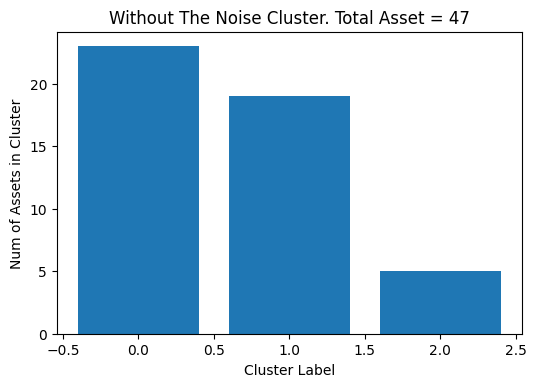

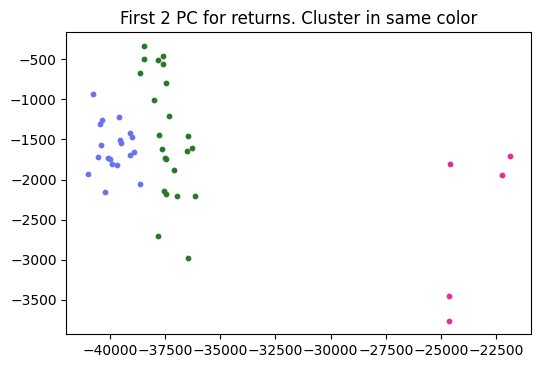

In [ ]:
# bar plot
plt.figure(dpi=100)
plt.bar(clusters_no_noise, cluster_size_no_noise)
plt.xlabel('Cluster Label')
plt.ylabel('Num of Assets in Cluster')
plt.title('Without The Noise Cluster. Total Asset = {}'.format(len(available_assets)))
plt.show()

# cluster w.r.t. the two principle components
colors = {cluster: np.random.rand(3) for cluster in clusters_no_noise}
plt.figure(dpi=100)
for asset in available_assets:
    plt.scatter(returns_PCA[asset, 0], returns_PCA[asset, 1], s=10,
                color=colors[cluster_labels[asset]])

plt.title('First 2 PC for returns. Cluster in same color')
plt.show()
